# Q&A Activity Week -06

1. Find out how many countries are there in the dataset.
2. Examine the data by using visualizations.
3. Find out how many countries with respect to the region are available in the dataset
4. On average which region has the highest
   - GDP per capita (current US Dollar)
   - International trade: Imports (million US Dollar)
5. Find out which region has more consistent with respect to GDP per capita (current US Dollar)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('Dataset_w6.xlsx - Data.csv')

In [9]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


## Checking for null values

In [10]:
df.isnull().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

## 1. Number of countries in the dataset

In [11]:
df['country'].value_counts().count()

196

**There are 196 countries in the dataset**

## 2. Examine the data using visualizations

In [12]:
df['GDP per capita (current US$)'].value_counts(bins=10)

(44.483000000000004, 10146.13]    127
(10146.13, 20147.76]               28
(20147.76, 30149.39]               10
(40151.02, 50152.65]                9
(30149.39, 40151.02]                8
(50152.65, 60154.28]                6
(70155.91, 80157.54]                3
(60154.28, 70155.91]                2
(90159.17, 100160.8]                2
(80157.54, 90159.17]                1
Name: GDP per capita (current US$), dtype: int64

In [16]:
df['International trade: Imports (million US$)'].value_counts(bins=10)

(-2237.65, 224976.9]      179
(224976.9, 449941.8]       10
(449941.8, 674906.7]        4
(899871.6, 1124836.5]       1
(1574766.3, 1799731.2]      1
(2024696.1, 2249661.0]      1
(674906.7, 899871.6]        0
(1124836.5, 1349801.4]      0
(1349801.4, 1574766.3]      0
(1799731.2, 2024696.1]      0
Name: International trade: Imports (million US$), dtype: int64

In [17]:
df['country'][df['International trade: Imports (million US$)']<0].count()

0

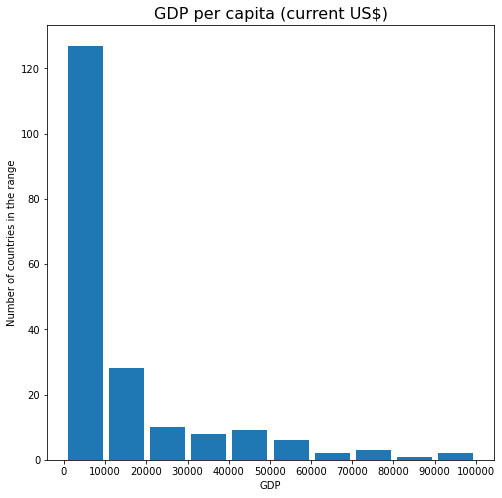

In [18]:
plt.figure(figsize=(8,8))
plt.hist(df['GDP per capita (current US$)'],rwidth=0.85,bins=10)
plt.title("GDP per capita (current US$)",fontsize=16)
plt.xlabel("GDP",fontsize=10)
plt.ylabel("Number of countries in the range",fontsize=10)
plt.xticks(np.arange(0,110000,10000))
plt.yticks()
plt.show()

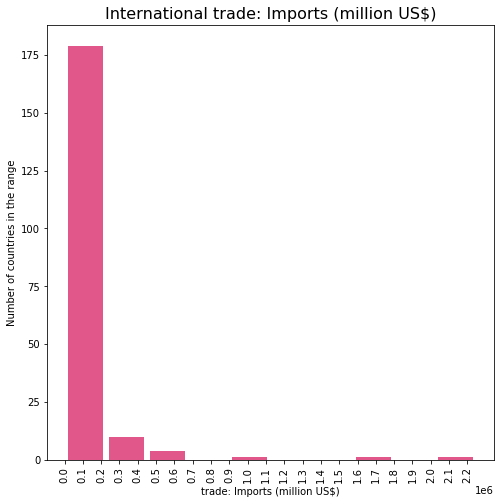

In [15]:
plt.figure(figsize=(8,8))
plt.hist(df['International trade: Imports (million US$)'],color='#E1578A',rwidth=0.85,bins=10)
plt.title("International trade: Imports (million US$)",fontsize=16)
plt.xlabel("trade: Imports (million US$)",fontsize=10)
plt.ylabel("Number of countries in the range",fontsize=10)
plt.xticks(np.arange(0,2300000,100000))
plt.yticks()
plt.xticks(rotation=90)
plt.show()

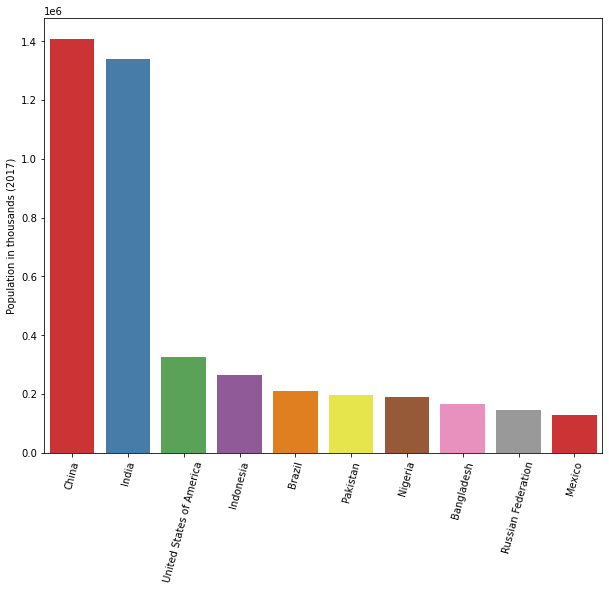

In [27]:
#most populates countries
pop = df.sort_values('Population in thousands (2017)',ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='country', y='Population in thousands (2017)', data=pop, palette='Set1')
plt.xticks(rotation=75)
plt.xlabel(xlabel='')
plt.show()

## 3. Number of countries with respect to Regions

In [19]:
df[['country','Region']].groupby('Region').count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


## 4. a. On average which region has the highest GDP per capita (current US$)

In [26]:
df[['Region','GDP per capita (current US$)']]\
    .groupby('Region').mean()\
    .sort_values(by=['GDP per capita (current US$)'], inplace=False, ascending=False).head(1)

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


**NorthernAmerica has the highest per capita(current US$) on average**

## 4. b. On average which region has the highest International trade: Imports (million US$

In [21]:
df[['Region','International trade: Imports (million US$)']]\
    .groupby('Region').mean()\
    .sort_values(by=['International trade: Imports (million US$)'], inplace=False, ascending=False).head(1)

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


**NorthernAmerica has the highest International trade: Imports (million US$) on average**

## 5. Which region is more consistent with respect to GDP per capita (current US$)

In [23]:
df1=df[['GDP per capita (current US$)','Region']]\
    .groupby("Region").std()\
    .sort_values(by=['GDP per capita (current US$)'],inplace=False)

In [25]:
df1.head()

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399
NorthernAfrica,974.706575
SouthernAfrica,2177.551120
SouthernAsia,2855.708179
EasternAfrica,3716.131770


**WesternAfrica is more consistent with respect to GDP per capita (current US$)**